Assignment 4 <br>
Question 1<br>
A) Parallel Plates. Using thermalradiation.net the configuration factor is 0.4152. This code generally ouputs a factor of 0.41.


F12 = 0.4244


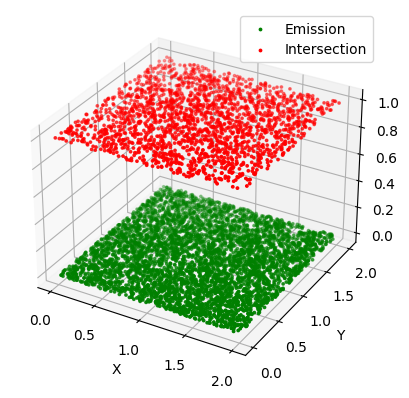

In [9]:
import numpy as np
import radMC as mc
import matplotlib.pyplot as plt

#Plane 1
lx1 = 2
ly1 = 2
lz1 = 0

#Plane 2
p2 = np.array([2.0, 2.0, 1.0])
n2 = np.array([0.0, 0.0, 1.0])
r2 = np.array([[0.0, 2.0], [0.0, 2.0], [1.0, 1.0]])

#Emission Position
nRay = int(5e3)     # Number of rays
ic = 0  # intialize intersection counter
pf = 1  # plotting flag (=1 for plot) 

# Apply tolerance to second surface (needed to ensure intersection is detected)
tol = 1e-12
r2[:,0] = r2[:,0]-tol
r2[:,1] = r2[:,1]+tol

# Initialize vectors for plotting 
pVec = np.empty((0,3),int)
iVec = np.empty((0,3),int)
dVec = np.empty((0,3),int)


for n in range(nRay):
    # Emission position 
    pos = mc.posnX(lx1,ly1,lz1)
    pVec = np.append(pVec,np.array([pos]),axis=0)
    
    # Emission direction 
    dirn = mc.dirn()
    dVec = np.append(dVec,np.array([dirn]),axis=0)
    
    # Calculate intersection with infinte plane
    t = np.dot(n2,(p2-pos)) / (np.dot(n2,dirn))
    
    # Check if intersection is within finite planar geometry 
    
    # position on plane 2
    pi = pos + t*dirn
    
#    Initialize boolean vector 
    b=np.ones(3,dtype=bool)
    
    # Check if point is in x,y,z range of surface 2 
    for i in range(3):
        b[i] = pi[i]>=r2[i,0]  and pi[i]<=r2[i,1]

        
    if b.all(): # If all coords are within finite range of surface 2 - intersection: 
        ic = ic+1
        iVec = np.append(iVec, np.array([pi],),axis=0)


# Calculate view factor
f12 = ic/nRay
print('F12 = {:.4}'.format(f12))
 
# Plotting
if pf == 1:
    plt.close('all')
    plt.clf()
    fig1 = plt.figure(1)
    ax1 = plt.subplot(projection='3d')
    ax1.scatter(pVec[:,0], pVec[:,1], pVec[:,2],
                s=3,color='g',marker='o')
    ax1.scatter(iVec[:,0], iVec[:,1], iVec[:,2],
                s=3,color='r',marker='o')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    ax1.legend(['Emission','Intersection'])
    plt.show()
    
    # #      Uncomment to plot emitted rays        
    # ax1.quiver(pVec[:,0], pVec[:,1], pVec[:,2], 
    #       dVec[:,0], dVec[:,1], dVec[:,2], 
    #       length = 0.5,
    #       arrow_length_ratio =0.1,
    #       lw=0.1, color='k')



B) Angled plates. Using thermalradiation.net the configuration factor is 0.4152. This code generally ouputs a factor of 0.0746.
 

[-0.8660254  0.         0.5      ]
F12 = 0.0


C:\Users\kylek\AppData\Local\Temp\ipykernel_24168\1191024667.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


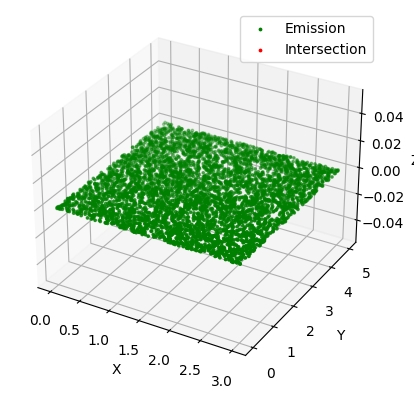

In [10]:
# Angled Planes (acute angles only)----------------------
# Define plane 1
lx1 = 3    #length in x dirn
ly1 = 5    #length in y dirn
lz1 = 0    #length in z dirn

# Define Plane 2
ang = 60*np.pi/180  # angle separating planes
p2 = np.array([0, 0, 0])  # Point on 2
n2 = np.array([-np.sin(ang), 0.0, np.cos(ang)])  # normal vector for 2
print(n2)
## range of x,y,z for surface 2
r2 = np.array([[-2*np.cos(ang), -2*np.cos(ang)+3*np.cos(ang)], [0.0, 10.0], [2*np.sin(ang), 2*np.sin(ang)+ 3*np.sin(ang)]])

#Emission Position
nRay = int(5e3)     # Number of rays
ic = 0  # intialize intersection counter
pf = 1  # plotting flag (=1 for plot) 

# Apply tolerance to second surface (needed to ensure intersection is detected)
tol = 1e-12
r2[:,0] = r2[:,0]-tol
r2[:,1] = r2[:,1]+tol

# Initialize vectors for plotting 
pVec = np.empty((0,3),int)
iVec = np.empty((0,3),int)
dVec = np.empty((0,3),int)


for n in range(nRay):
    # Emission position 
    pos = mc.posnX(lx1,ly1,lz1)
    pVec = np.append(pVec,np.array([pos]),axis=0)
    
    # Emission direction 
    dirn = mc.dirn()
    dVec = np.append(dVec,np.array([dirn]),axis=0)
    
    # Calculate intersection with infinte plane
    t = np.dot(n2,(p2-pos)) / (np.dot(n2,dirn))
    
    # Check if intersection is within finite planar geometry 
    
    # position on plane 2
    pi = pos + t*dirn
    
#    Initialize boolean vector 
    b=np.ones(3,dtype=bool)
    
    # Check if point is in x,y,z range of surface 2 
    for i in range(3):
        b[i] = pi[i]>=r2[i,0]  and pi[i]<=r2[i,1]

        
    if b.all(): # If all coords are within finite range of surface 2 - intersection: 
        ic = ic+1
        iVec = np.append(iVec, np.array([pi],),axis=0)


# Calculate view factor
f12 = ic/nRay
print('F12 = {:.4}'.format(f12))
 
# Plotting
if pf == 1:
    
    plt.close('all')
    plt.clf()
    fig1 = plt.figure(1)
    ax1 = plt.subplot(projection='3d')
    ax1.scatter(pVec[:,0], pVec[:,1], pVec[:,2],
                s=3,color='g',marker='o')
    ax1.scatter(iVec[:,0], iVec[:,1], iVec[:,2],
                s=3,color='r',marker='o')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    ax1.legend(['Emission','Intersection'])
    fig1.show()
    
    # #      Uncomment to plot emitted rays        
    # ax1.quiver(pVec[:,0], pVec[:,1], pVec[:,2], 
    #       dVec[:,0], dVec[:,1], dVec[:,2], 
    #       length = 0.5,
    #       arrow_length_ratio =0.1,
    #       lw=0.1, color='k')
